In [1]:
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

pd.options.plotting.backend = 'plotly'
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected= True)
cf.go_offline()

In [2]:
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')

In [3]:
suicides = pd.read_csv('E:\\DevIncept\\My Contributions\\Suicides in India 2001-2012.csv')
suicides.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
suicides.shape

(237519, 7)

In [5]:
suicides = suicides[suicides['Total'] != 0]

In [6]:
suicides.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [7]:
suicides['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

### we can see that we are having some irrelevant data in states column. These values will may produce some errors do we are going to remove them.

In [8]:
suicides['Age_group'].unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

### Similarly we have age group of 0-100+ which may results in irregularity in our data so we are going to remove it as well along with the data in State column.

In [9]:
df = suicides[suicides['State']!='Total (All India)']    
df = df[suicides['State']!= 'Total (States)']        
df = df[suicides['State']!= 'Total (Uts)']
df = df[suicides['Age_group']!= '0-100+']

In [10]:
print(df['State'].unique())
print(df['Age_group'].unique())

['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'Daman & Diu' 'Delhi (Ut)'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']
['0-14' '15-29' '30-44' '45-59' '60+']


In [11]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8


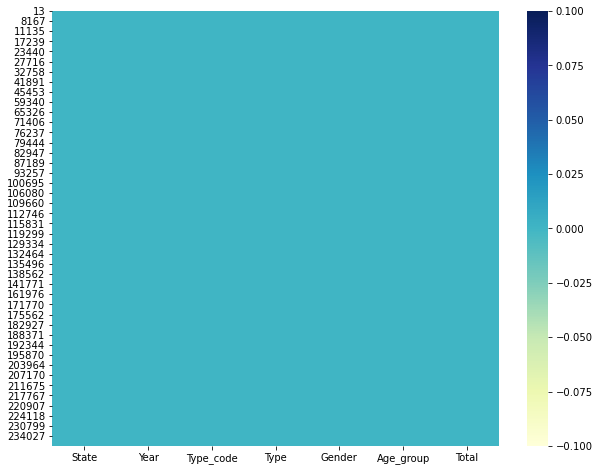

In [12]:
plt.figure(figsize = (10,8))
sns.heatmap(df.isnull(), cmap = 'YlGnBu')
plt.show()

## There are no null values in our dataset.

In [13]:
df_gender = pd.DataFrame(df.groupby('Gender')['Total'].sum()).reset_index()

df_gender


,Gender,Total
0,Female,1558896
1,Male,2777252


In [14]:
# Checking what is the total no. of suicides 
print("Total suicides in India (2001-2012): ",df_gender['Total'].sum())

Total suicides in India (2001-2012):  4336148


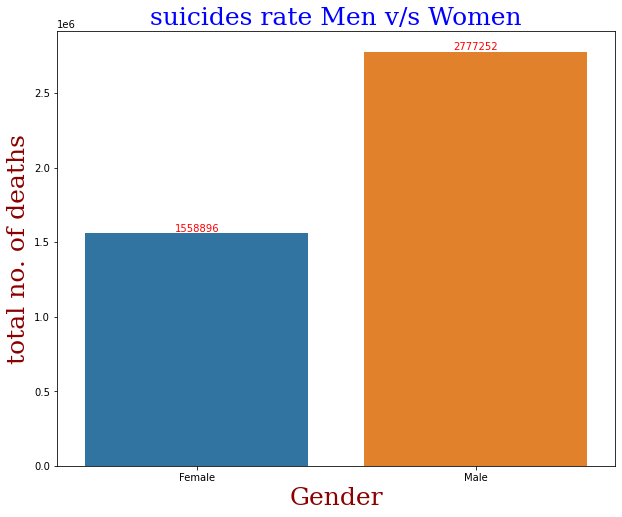

In [15]:
plt.figure(figsize = (10, 8))
font1 = {'family':'serif','color':'blue','size':25}
font2 = {'family':'serif','color':'darkred','size':25}
fig = sns.barplot(x = 'Gender', y = 'Total', data=df_gender)
for i, row in df_gender.iterrows():
    fig.text(x = row.name, y = row.Total+10000, s = str(row.Total), color='red', ha = 'center')
plt.title('suicides rate Men v/s Women', fontdict=font1)
plt.xlabel("Gender", fontdict=font2)
plt.ylabel("total no. of deaths", fontdict=font2)
plt.show()

In [16]:
df_state = pd.DataFrame(df['Total'].groupby(df['State']).sum())
df_state = df_state.reset_index().sort_values("Total", ascending=False)
df_state.head()

,State,Total
20,Maharashtra,541167
34,West Bengal,497962
30,Tamil Nadu,491065
1,Andhra Pradesh,488419
16,Karnataka,440895


## These are the top 5 states which is having the suicide-rate very high during the period of 2001-2012.

In [17]:
# To ensure that we going in right we'll count the total no. of suicides in df_state.
df_state.sum()

State    MaharashtraWest BengalTamil NaduAndhra Pradesh...
Total                                              4336148
dtype: object

## The above value is exactly matching to the sum of suicides in df_gender

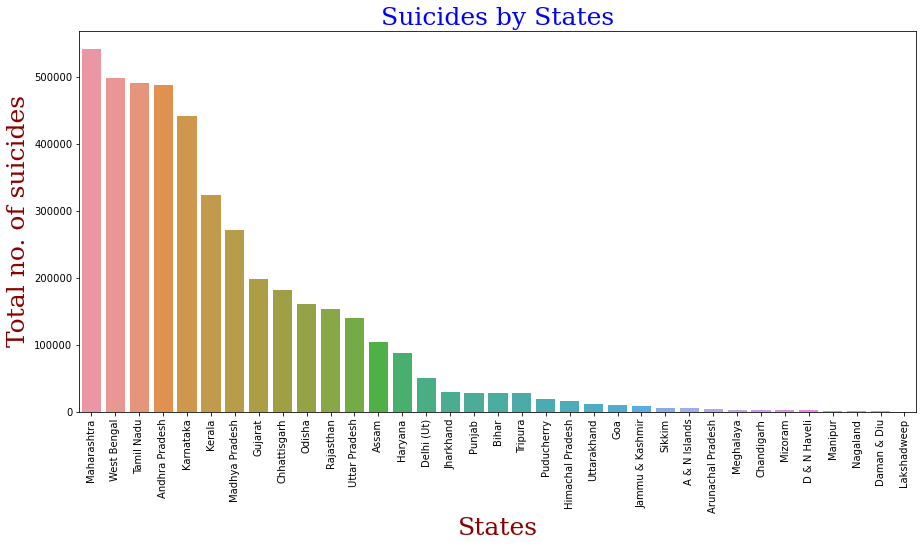

In [18]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'State', y="Total", data=df_state)
plt.xticks(rotation=90)
plt.title("Suicides by States", fontdict=font1)
plt.xlabel("States",fontdict= font2)
plt.ylabel("Total no. of suicides",fontdict= font2)
# plt.tight_layout()
plt.show()

## Most suicides were happened in Maharastra followed by West Bengal, Tamil Nadu, Andhra Pradesh (Southern part of India)

In [19]:
# creating a dataframe using Age_group to find out which age group has maximum no. of suicides
df_age = pd.DataFrame(df.groupby('Age_group')['Total'].sum()).reset_index()
df_age

,Age_group,Total
0,0-14,98410
1,15-29,1534037
2,30-44,1471599
3,45-59,885177
4,60+,346925


## We can see that max of suicides were happened in the age of 15-29 and 30-44(>13 Lacs)

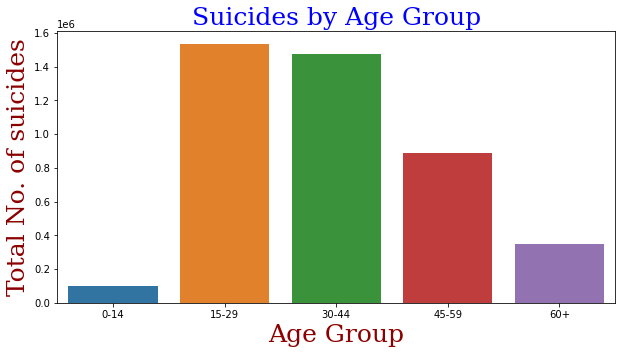

In [20]:
#lets visualize the same:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Age_group', y = 'Total', data=df_age)
plt.title("Suicides by Age Group", fontdict=font1)
plt.xlabel("Age Group", fontdict=font2)
plt.ylabel("Total No. of suicides", fontdict=font2)
plt.show()

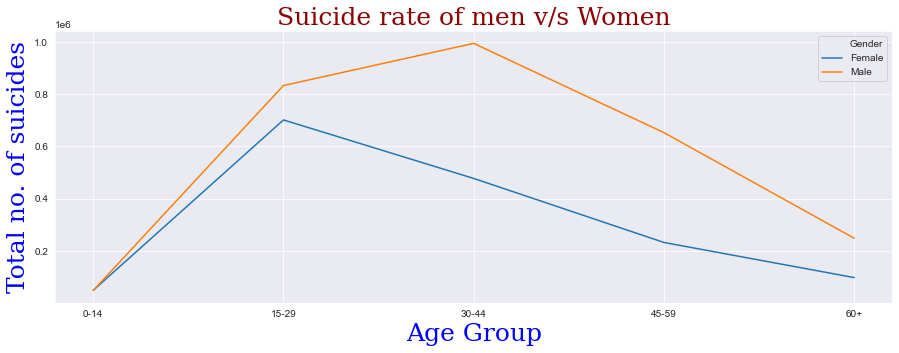

In [21]:
x = pd.DataFrame(df.groupby(['Age_group','Gender'])['Total'].sum()).reset_index()
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
sns.lineplot(x='Age_group', y='Total' ,data=x, hue = 'Gender')
plt.title("Suicide rate of men v/s Women", fontdict=font2)
plt.xlabel("Age Group", fontdict= font1)
plt.ylabel("Total no. of suicides", fontdict= font1)
plt.show()

## In all age groups, men's rate of suicides are greater then women.

In [22]:
# Now see the yearwise suicide rate
yearwise = df[['Year', 'Total']].groupby('Year').sum().reset_index()
yearwise

,Year,Total
0,2001,325428
1,2002,331146
2,2003,332516
3,2004,340955
4,2005,341717
5,2006,354319
6,2007,367845
7,2008,374980
8,2009,381127
9,2010,403728


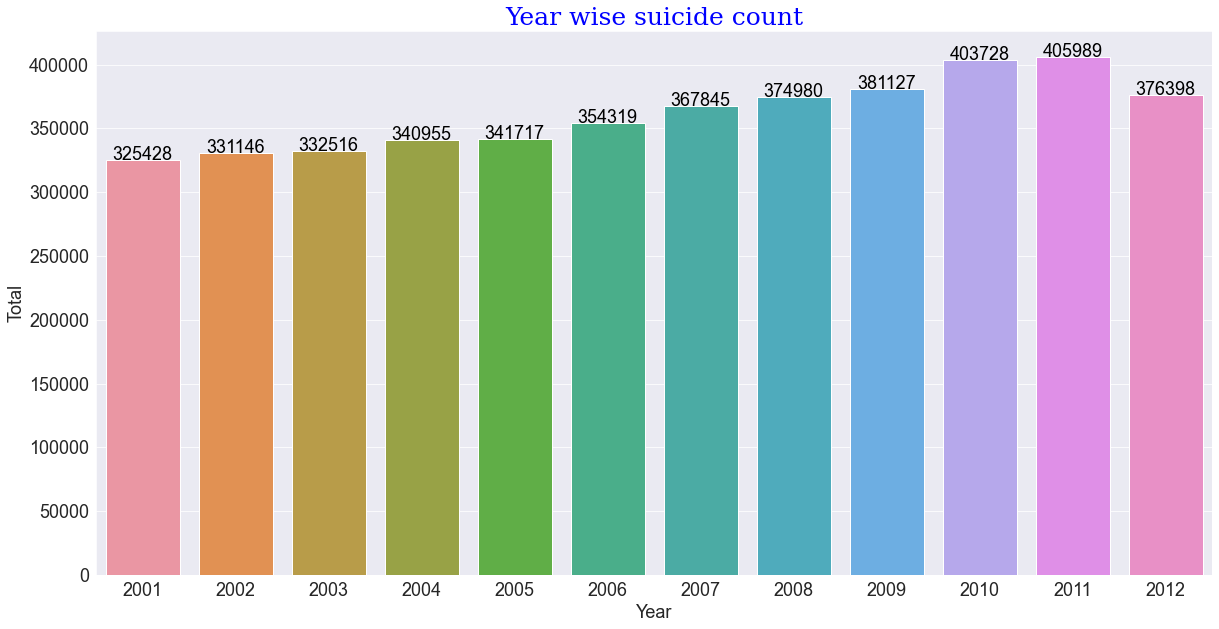

In [23]:
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(20,10))
fig = sns.barplot(x = 'Year', y = 'Total', data=yearwise)
for i,row in yearwise.iterrows():
    fig.text(x = row.name, y = row.Total, s = str(row.Total), color = 'Black', ha = 'center')

plt.title("Year wise suicide count", fontdict=font1)
plt.show()

In [24]:
round((yearwise['Total'].max() - yearwise['Total'].min())/yearwise['Total'].min()*100, 2)

24.76

### We can see that year 2011 has highest suicide rate: 405989
### and we have calculated the %growth of suicide rate from 2001 to 2011 which is = 24.76%

In [25]:
yearwise = df[['Year','Gender','Total']].groupby(['Year','Gender']).sum().reset_index()
yearwise

,Year,Gender,Total
0,2001,Female,126493
1,2001,Male,198935
2,2002,Female,123165
3,2002,Male,207981
4,2003,Female,121877
5,2003,Male,210639
6,2004,Female,123021
7,2004,Male,217934
8,2005,Female,122992
9,2005,Male,218725


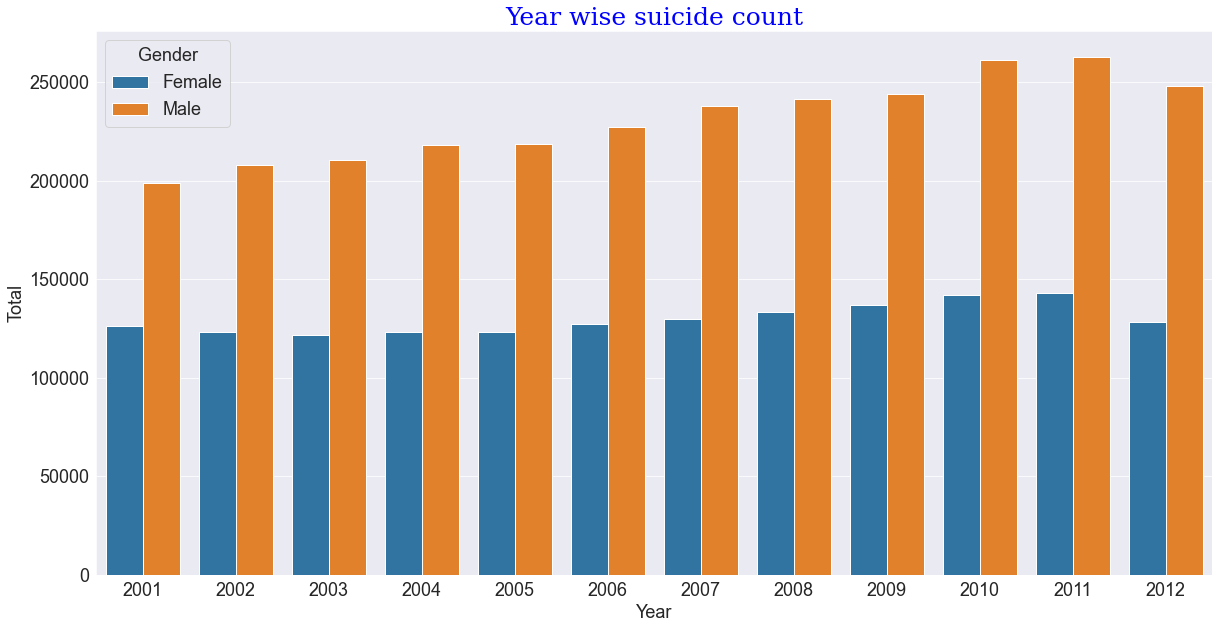

In [26]:
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='Total', hue='Gender', data=yearwise)
plt.title("Year wise suicide count", fontdict=font1)
plt.show()


### Now we check the reasons why there were so suicides of mens in India.

In [27]:
reasons = df[df['Type_code'] == 'Causes']
reasons['Type'].value_counts()

Causes Not known                                  3332
Other Causes (Please Specity)                     3065
Family Problems                                   3013
Other Prolonged Illness                           2680
Insanity/Mental Illness                           2572
Love Affairs                                      1697
Poverty                                           1568
Death of Dear Person                              1511
Fall in Social Reputation                         1496
Suspected/Illicit Relation                        1420
Drug Abuse/Addiction                              1406
Unemployment                                      1404
Property Dispute                                  1393
Failure in Examination                            1379
Bankruptcy or Sudden change in Economic           1373
Cancer                                            1233
Professional/Career Problem                       1160
Cancellation/Non-Settlement of Marriage           1116
Paralysis 

### Some of the reasons may seems to be similar. So we merge them.

In [28]:
# Category correction 
pd.options.mode.chained_assignment = None
reasons.loc[reasons['Type']=='Bankruptcy or Sudden change in Economic Status', 'Type'] = 'Bankruptcy'
reasons.loc[reasons['Type']=='Bankruptcy or Sudden change in Economic', 'Type'] = 'Bankruptcy'
reasons.loc[reasons['Type']=='Causes Not known', 'Type'] = 'Unknown'
reasons.loc[reasons['Type']=='Other Causes (Please Specity)', 'Type'] = 'Unknown'
reasons.loc[reasons['Type']=='Not having Children(Barrenness/Impotency', 'Type'] = 'Infertility'
reasons.loc[reasons['Type']=='Not having Children (Barrenness/Impotency', 'Type'] = 'Infertility'

In [29]:
reasons['Type'].value_counts()

Unknown                                    6397
Family Problems                            3013
Other Prolonged Illness                    2680
Insanity/Mental Illness                    2572
Love Affairs                               1697
Poverty                                    1568
Death of Dear Person                       1511
Bankruptcy                                 1499
Fall in Social Reputation                  1496
Suspected/Illicit Relation                 1420
Drug Abuse/Addiction                       1406
Unemployment                               1404
Property Dispute                           1393
Failure in Examination                     1379
Cancer                                     1233
Professional/Career Problem                1160
Infertility                                1131
Cancellation/Non-Settlement of Marriage    1116
Paralysis                                  1105
Illness (Aids/STD)                         1011
Dowry Dispute                           

In [30]:
reason_set = reasons[['Type','Total']]
reason_set = reason_set.groupby('Type').sum()
reason_set.reset_index(inplace=True)
reason_set = reason_set.sort_values('Total', ascending = False)
reason_set = reason_set.reset_index(drop=True)
reason_set

,Type,Total
0,Unknown,453119
1,Family Problems,341952
2,Other Prolonged Illness,194565
3,Insanity/Mental Illness,94229
4,Love Affairs,45039
5,Bankruptcy,35410
6,Poverty,32684
7,Dowry Dispute,31970
8,Drug Abuse/Addiction,30046
9,Unemployment,27365


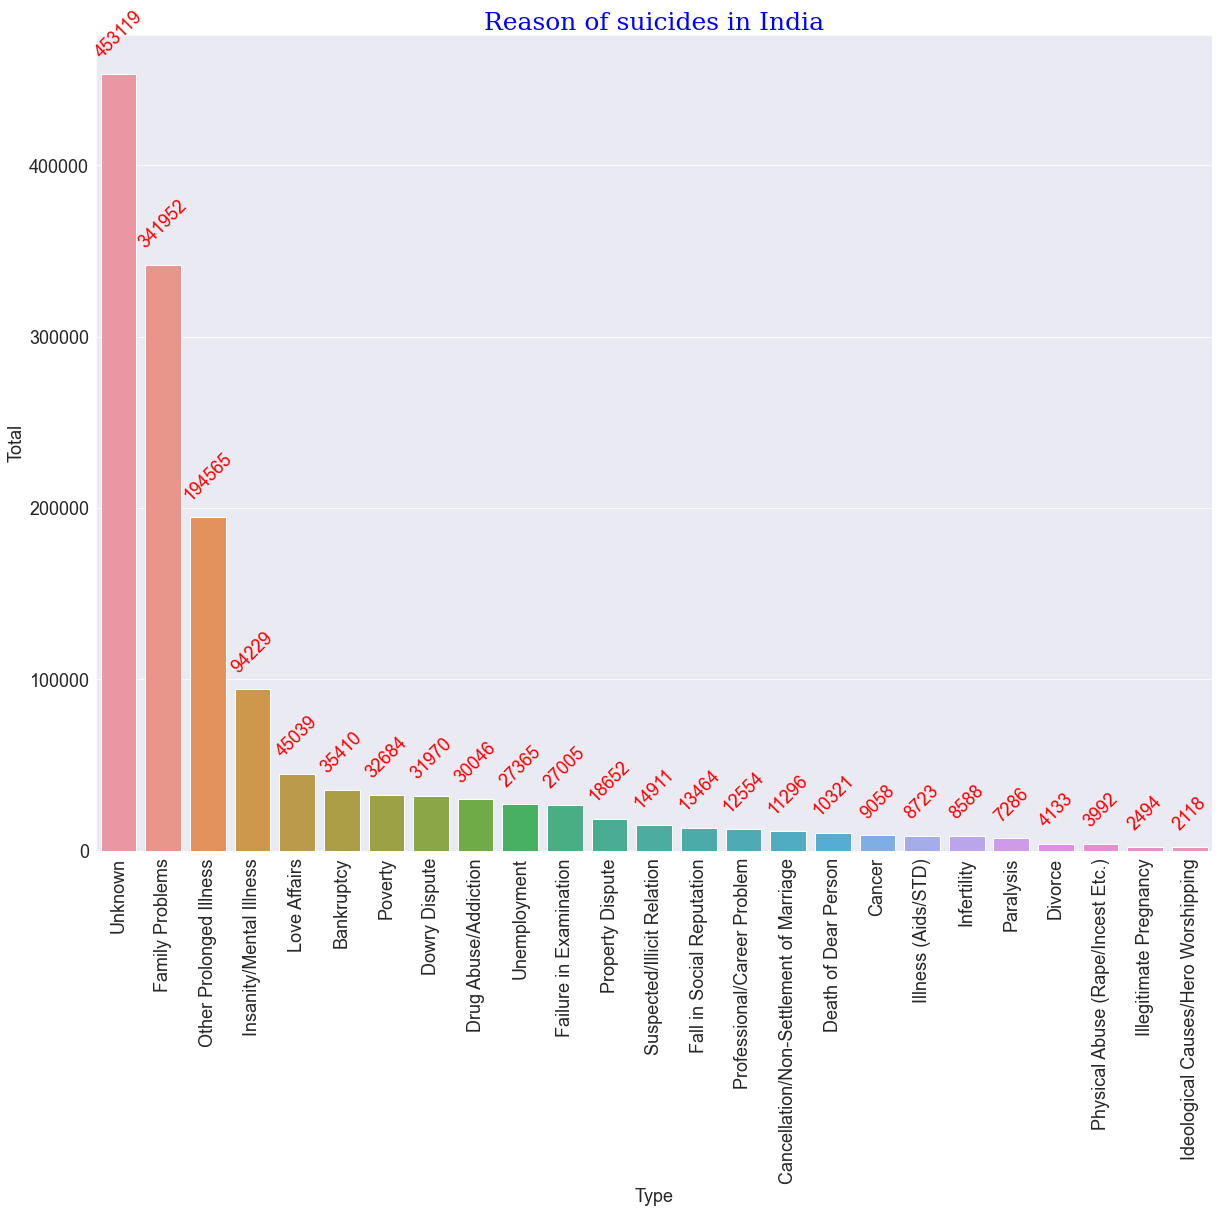

In [31]:
plt.figure(figsize=(20,15))
fig = sns.barplot(x='Type', y = 'Total', data=reason_set)
for i, row in reason_set.iterrows():
    fig.text(x = row.name, y = row.Total +10000 , s = str(row.Total), color = 'red', ha = 'center', rotation = 45)
plt.xticks(rotation = 90)
plt.title("Reason of suicides in India", fontdict=font1)
plt.show()

Insight from the above plot:
=> mostly suicide were due to:- Family problem, illness, Love affairs, bankcruptcy

## Finding suicide reasons for mens and womens

In [32]:
gender_set = reasons[['Type', 'Gender','Total']]
males = gender_set[gender_set['Gender'] == 'Male']
males = males.groupby('Type').sum().reset_index()
males = males.sort_values('Total', ascending=False)
males = males.reset_index(drop = True)


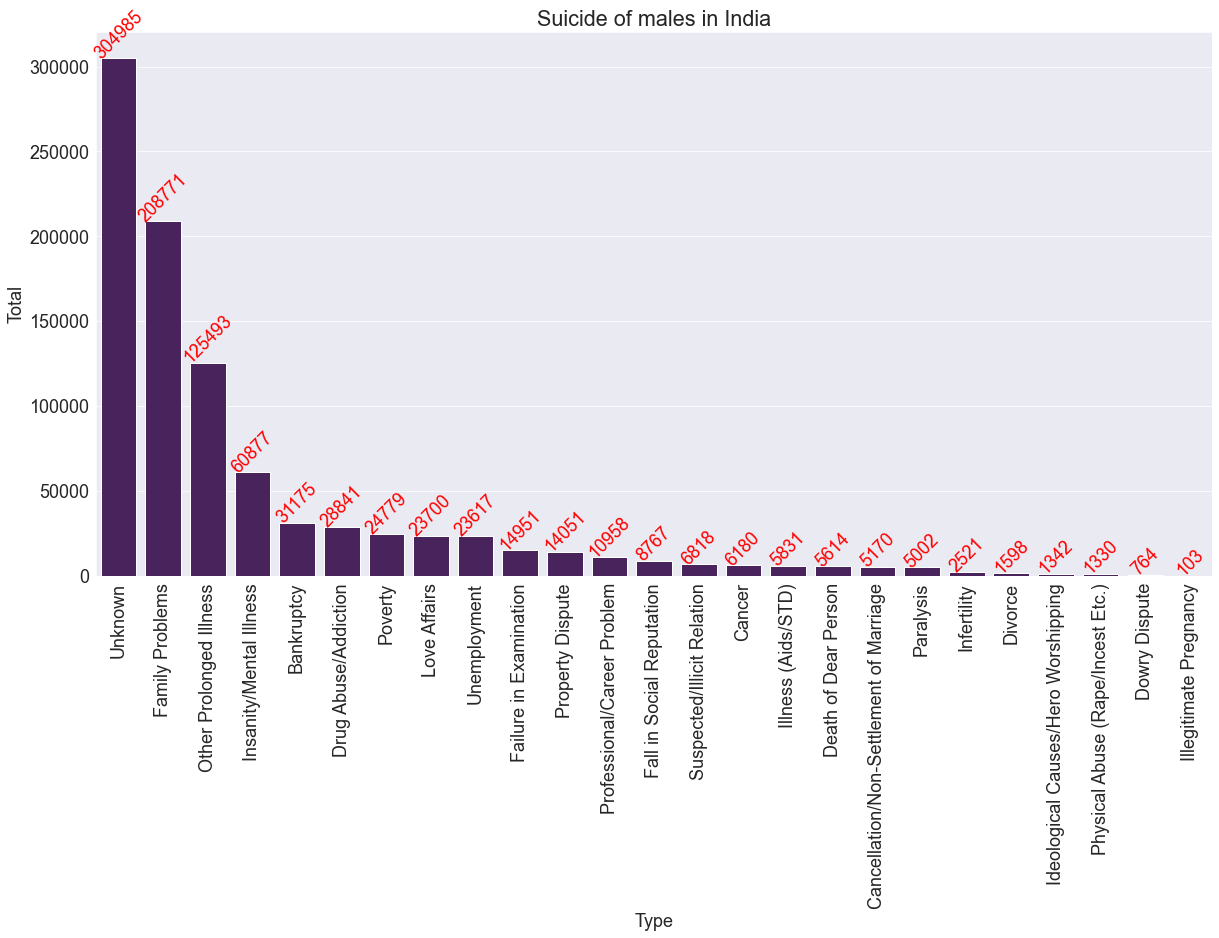

In [33]:
plt.figure(figsize=(20,10))
fig = sns.barplot(x = 'Type', y = 'Total', data=males, color=(0.3,0.1,0.4,0.6))
for i,row in males.iterrows():
    fig.text(x = row.name, y = row.Total, s =str(row.Total), color = 'red', ha = 'center', rotation = 45)
plt.title("Suicide of males in India")
plt.xticks(rotation = 90)
plt.show()

Insights: Mostly mens committed to suicides due to family problems followed by illness, bankruptcy, drug abuse, and poverty.

In [34]:
gender_set = reasons[['Type', 'Gender','Total']]
females = gender_set[gender_set['Gender'] == 'Female']
females= females.groupby('Type').sum().reset_index()
females = females.sort_values('Total', ascending=False)
females = females.reset_index(drop = True)

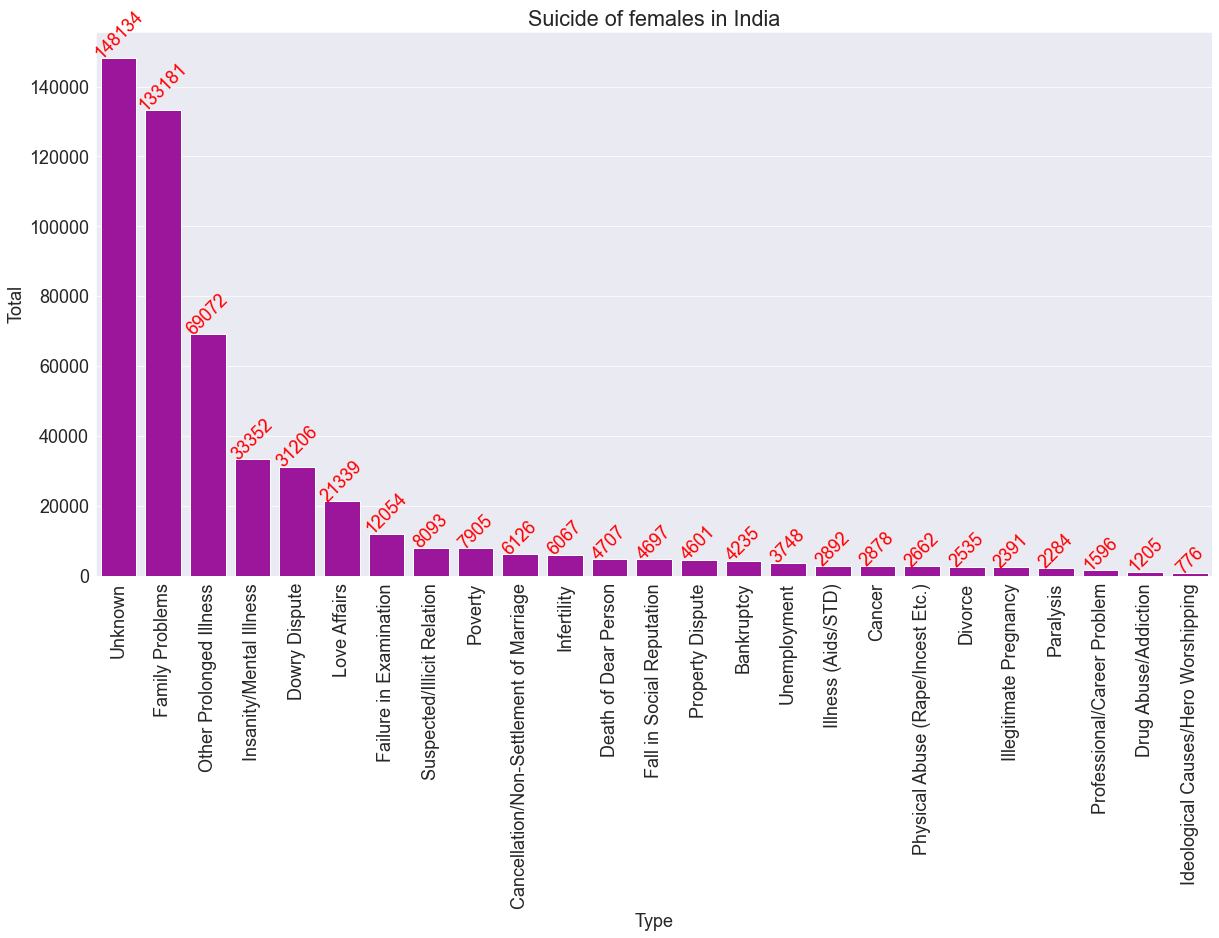

In [35]:
plt.figure(figsize=(20,10))
fig = sns.barplot(x = 'Type', y = 'Total', data=females, color=(0.7, 0,0.7,0.5))
for i,row in females.iterrows():
    fig.text(x = row.name, y = row.Total, s =str(row.Total), color = 'red', ha = 'center', rotation = 45)
plt.title("Suicide of females in India")
plt.xticks(rotation = 90)
plt.show()

Insights: Females also committed to suicide due to Family Problem followed by  Prolonged illness, Mental illness, Dowry dispute, and Love Affairs.

## Where females have more suicide rate than mens?

In [36]:
compare_set = pd.concat([males,females], axis= 1)
compare_set.columns = ['Type','Female','t','Male']
compare_set = compare_set.drop(columns=['t'])
compare_set = compare_set[compare_set['Female'] > compare_set['Male']]
compare_set

,Type,Female,Male
0,Unknown,304985,148134
1,Family Problems,208771,133181
2,Other Prolonged Illness,125493,69072
3,Insanity/Mental Illness,60877,33352
5,Drug Abuse/Addiction,28841,21339
6,Poverty,24779,12054
7,Love Affairs,23700,8093
8,Unemployment,23617,7905
9,Failure in Examination,14951,6126
10,Property Dispute,14051,6067


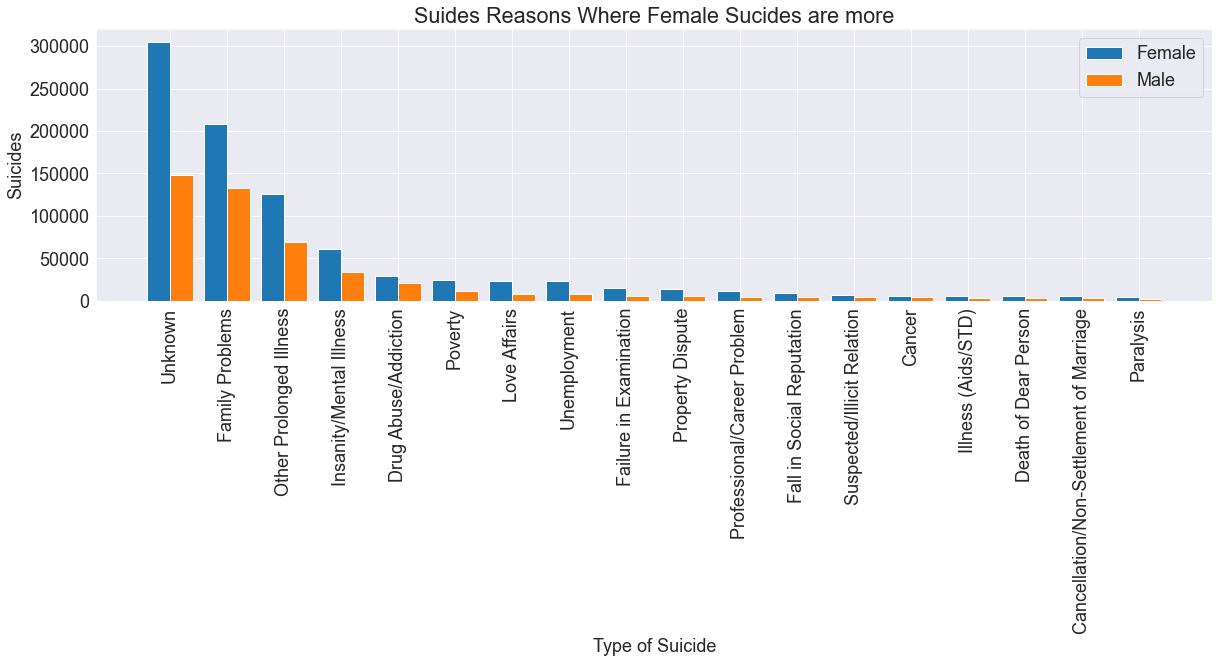

In [51]:
fig = plt.figure(figsize=(20,5))
N= len(compare_set)
ind = np.arange(N); width = 0.4 
category = list(compare_set['Type'])
plt.bar(x = ind, height = 'Female', data = compare_set, width = width)
plt.bar(x = ind+width, height = 'Male', data = compare_set, width = width)
plt.xlabel("Type of Suicide")
plt.ylabel("Suicides")
plt.title("Suides Reasons Where Female Sucides are more")
plt.xticks(ind+width/2, category,rotation='vertical')
plt.legend(['Female', 'Male'])
plt.show()

Insights:

1. We see that due to Family issues, women are commiting more suicides than mens.
2. Also, it is seen from the above plot that due to illness and drug related issues, the suicides rates of women is higher in comparison to mens.

#Insights from the Data:

1. We have seen that mens rate of suicides are greater than women(Almost in all years,all types,all age groups)
2. Southern part of India has more suicides cases from 2001-2012.
3. Women are committing suicides due to family issues, drug issues, Several Illnesses, love affairs.
4. 2010,2011 has the highest rate of suicides out the 2001-2012.
5. Suicides has crossed the percentage of 24% from 2001 to 2011(highest suicides cases).